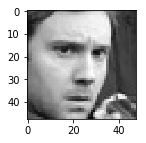

[[ 72  78  81 ...  52  43  40]
 [ 65  62  59 ...  55  52  45]
 [ 47  42  60 ...  47  54  49]
 ...
 [ 91  65  46 ...  74  54  43]
 [ 76  80  76 ... 108  69  46]
 [ 77  74  81 ... 105 108  82]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
base_path = "./images/images/"
pic_size = 48

i = 0
plt.figure(0, figsize=(2,2))
for expression in os.listdir(base_path + "train/"):    
    img = cv2.imread(base_path + "train/" + expression + "/" + os.listdir(base_path + "train/" + expression)[i], cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    break
plt.show() 
print(img)

In [3]:
training_data = []
categories = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise" ]
def create_training_data():
    for category in categories:
        print(category)
        path = base_path + "train/"
        path = os.path.join(path,category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            training_data.append([img_array, categories.index(category)])  # add this to our training_data            

create_training_data()
print(len(training_data))

angry
disgust
fear
happy
neutral
sad
surprise
28821


In [4]:
for i in range(10):
    print(training_data[i][1])

0
0
0
0
0
0
0
0
0
0


In [29]:
# train x and train y lists.
train_X = []
train_y = []

In [30]:
for features, label in training_data:
    train_X.append(features)
    train_y.append(label)
train_X = np.array(train_X).reshape(-1, pic_size, pic_size, 1)
train_y = np.array(train_y)

In [31]:
for i in range(3):
    print(train_X[i])
    print(train_y[i])

[[[ 72]
  [ 78]
  [ 81]
  ...
  [ 52]
  [ 43]
  [ 40]]

 [[ 65]
  [ 62]
  [ 59]
  ...
  [ 55]
  [ 52]
  [ 45]]

 [[ 47]
  [ 42]
  [ 60]
  ...
  [ 47]
  [ 54]
  [ 49]]

 ...

 [[ 91]
  [ 65]
  [ 46]
  ...
  [ 74]
  [ 54]
  [ 43]]

 [[ 76]
  [ 80]
  [ 76]
  ...
  [108]
  [ 69]
  [ 46]]

 [[ 77]
  [ 74]
  [ 81]
  ...
  [105]
  [108]
  [ 82]]]
0
[[[152]
  [149]
  [147]
  ...
  [129]
  [139]
  [121]]

 [[149]
  [152]
  [150]
  ...
  [121]
  [146]
  [135]]

 [[152]
  [152]
  [157]
  ...
  [112]
  [121]
  [145]]

 ...

 [[187]
  [189]
  [120]
  ...
  [184]
  [185]
  [188]]

 [[188]
  [189]
  [193]
  ...
  [185]
  [181]
  [189]]

 [[186]
  [185]
  [183]
  ...
  [193]
  [181]
  [183]]]
0
[[[ 29]
  [ 25]
  [ 21]
  ...
  [ 38]
  [ 45]
  [ 37]]

 [[ 31]
  [ 24]
  [ 20]
  ...
  [ 36]
  [ 36]
  [ 40]]

 [[ 28]
  [ 21]
  [ 21]
  ...
  [ 35]
  [ 32]
  [ 40]]

 ...

 [[ 28]
  [ 29]
  [ 26]
  ...
  [118]
  [137]
  [148]]

 [[ 30]
  [ 30]
  [ 26]
  ...
  [151]
  [158]
  [164]]

 [[ 32]
  [ 30]
  [ 27]
  

In [32]:
import pickle
pickle_out = open("train_X.pickle" , "wb")
pickle.dump(train_X, pickle_out)
pickle_out.close()

pickle_out = open("train_y.pickle" , "wb")
pickle.dump(train_y, pickle_out)
pickle_out.close()

In [20]:
pickle_in = open("train_X.pickle", "rb")
train_X = pickle.load(pickle_in)
print(train_X[1])

[[[152]
  [149]
  [147]
  ...
  [129]
  [139]
  [121]]

 [[149]
  [152]
  [150]
  ...
  [121]
  [146]
  [135]]

 [[152]
  [152]
  [157]
  ...
  [112]
  [121]
  [145]]

 ...

 [[187]
  [189]
  [120]
  ...
  [184]
  [185]
  [188]]

 [[188]
  [189]
  [193]
  ...
  [185]
  [181]
  [189]]

 [[186]
  [185]
  [183]
  ...
  [193]
  [181]
  [183]]]


In [33]:
pickle_in = open("train_y.pickle", "rb")
train_y = pickle.load(pickle_in)

In [34]:
validation_data = []
def create_validation_data():    
    for category in categories:
        print(category)
        path = base_path + "validation/"
        path = os.path.join(path,category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            validation_data.append([img_array, categories.index(category)])  # add this to our training_data            

create_validation_data()
print(len(validation_data))
    

angry
disgust
fear
happy
neutral
sad
surprise
7066


In [23]:
# test x and test y lists.
test_X = []
test_y = []

In [24]:
for features, label in validation_data:
    test_X.append(features)
    test_y.append(label)
test_X = np.array(test_X).reshape(-1, pic_size, pic_size, 1) 
test_y = np.array(test_y) 

In [25]:
import pickle
pickle_out = open("test_X.pickle" , "wb")
pickle.dump(test_X, pickle_out)
pickle_out.close()

pickle_out = open("test_y.pickle" , "wb")
pickle.dump(test_y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("test_X.pickle", "rb")
test_X = pickle.load(pickle_in)
print(test_X[1])

[[[ 23]
  [ 26]
  [ 21]
  ...
  [217]
  [220]
  [218]]

 [[ 25]
  [ 36]
  [ 16]
  ...
  [209]
  [203]
  [208]]

 [[ 30]
  [ 28]
  [ 11]
  ...
  [179]
  [214]
  [245]]

 ...

 [[ 48]
  [ 43]
  [ 55]
  ...
  [223]
  [222]
  [222]]

 [[ 36]
  [ 20]
  [ 64]
  ...
  [252]
  [255]
  [255]]

 [[ 59]
  [ 56]
  [ 46]
  ...
  [252]
  [252]
  [253]]]


In [26]:
pickle_in = open("test_y.pickle", "rb")
test_y = pickle.load(pickle_in)

In [28]:
nsamples, nx, ny, nz = train_X.shape
train_X = train_X.reshape((nsamples,nx*ny*nz))

nsamples, nx, ny, nz = test_X.shape
test_X = test_X.reshape((nsamples,nx*ny*nz))

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
print("Dimension of Train set",train_X.shape)
print("Dimension of Test set",test_X.shape,"\n")

# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)